In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/sample_data/mushroom.csv')
print("Dataset loaded:", df.shape)
print("\nClass distribution:")
print(df['class'].value_counts())
print("\nNo missing values:", df.isnull().sum().sum())

Dataset loaded: (2000, 26)

Class distribution:
class
poisonous    1400
edible        600
Name: count, dtype: int64

No missing values: 0


In [3]:
le_class = LabelEncoder()
df['class'] = le_class.fit_transform(df['class'])

In [4]:
le = LabelEncoder()
for col in df.columns[1:-3]:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [5]:
X = df.drop(['Unnamed: 0', 'class', 'stalk_height', 'cap_diameter'], axis=1)
y = df['class']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nTrain: {X_train.shape}, Test: {X_test.shape}")


Train: (1600, 22), Test: (400, 22)


In [7]:
svm_linear = SVC(kernel='linear', C=1, random_state=42)
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_poly = SVC(kernel='poly', C=1, degree=3, random_state=42)

In [8]:
svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)

SVC(C=1, kernel='poly', random_state=42)

In [9]:
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)
y_pred_poly = svm_poly.predict(X_test)

In [10]:
print("\nSVM Linear Accuracy:", accuracy_score(y_test, y_pred_linear))
print("SVM RBF Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("SVM Poly Accuracy:", accuracy_score(y_test, y_pred_poly))


SVM Linear Accuracy: 0.7
SVM RBF Accuracy: 0.715
SVM Poly Accuracy: 0.7325


In [11]:
print("\nRBF Classification Report:")
print(classification_report(y_test, y_pred_rbf, target_names=['edible', 'poisonous']))


RBF Classification Report:
              precision    recall  f1-score   support

      edible       0.88      0.06      0.11       120
   poisonous       0.71      1.00      0.83       280

    accuracy                           0.71       400
   macro avg       0.79      0.53      0.47       400
weighted avg       0.76      0.71      0.61       400



In [12]:
plt.figure(figsize=(15,5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Text(0.5, 1.0, 'Class Distribution')

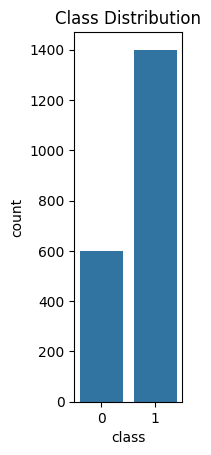

In [13]:
plt.subplot(1,4,1)
sns.countplot(x='class', data=df)
plt.title('Class Distribution')

Text(0.5, 1.0, 'PCA 2D View')

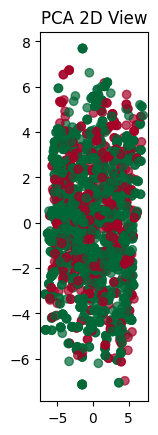

In [14]:
plt.subplot(1,4,2)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='RdYlGn', alpha=0.7)
plt.title('PCA 2D View')

Text(0.5, 1.0, 'RBF Confusion Matrix')

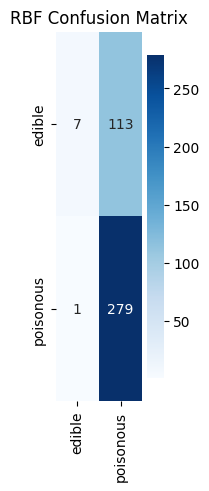

In [15]:
plt.subplot(1,4,3)
cm = confusion_matrix(y_test, y_pred_rbf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['edible','poisonous'], yticklabels=['edible','poisonous'])
plt.title('RBF Confusion Matrix')

(0.9, 1.0)

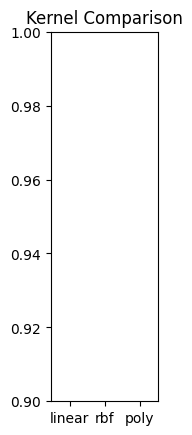

In [16]:
plt.subplot(1,4,4)
kernels = ['linear', 'rbf', 'poly']
accs = [accuracy_score(y_test, y_pred_linear),
        accuracy_score(y_test, y_pred_rbf),
        accuracy_score(y_test, y_pred_poly)]
plt.bar(kernels, accs)
plt.title('Kernel Comparison')
plt.ylim(0.9, 1.0)

In [17]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [18]:
print("\nSVM Hyperparameters:")
print("- Kernel: RBF (best)")
print("- C (regularization): 1")
print("- gamma: scale")
print("\nCommon SVM Kernels:")
print("- linear (fast, simple boundaries)")
print("- rbf (curved boundaries)")
print("- poly (polynomial boundaries)")


SVM Hyperparameters:
- Kernel: RBF (best)
- C (regularization): 1
- gamma: scale

Common SVM Kernels:
- linear (fast, simple boundaries)
- rbf (curved boundaries)
- poly (polynomial boundaries)
